# Sapore DiVino

Sapore DiVino è un progetto di Machine Learning che ha l'obiettivo di studiare le caratteristiche dei vini e classificare ciascuno di essi se è di qualita o meno

Inizio con l'importazione delle varie librerie che mi serviranno con l'intero sviluppo del progetto

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

Dopodiché leggo il dataset preso da Kaggle (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)

In [9]:
dataset = pd.read_csv('winequality-red.csv')

dataset.sample(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
431,7.8,0.55,0.35,2.2,0.074,21.0,66.0,0.99740,3.25,0.56,9.2,5
447,9.3,0.48,0.29,2.1,0.127,6.0,16.0,0.99680,3.22,0.72,11.2,5
1127,6.3,0.76,0.00,2.9,0.072,26.0,52.0,0.99379,3.51,0.60,11.5,6
1530,6.6,0.44,0.09,2.2,0.063,9.0,18.0,0.99444,3.42,0.69,11.3,6
43,8.1,0.66,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5
477,10.4,0.24,0.49,1.8,0.075,6.0,20.0,0.99770,3.18,1.06,11.0,6
1581,6.2,0.56,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
183,6.8,0.61,0.20,1.8,0.077,11.0,65.0,0.99710,3.54,0.58,9.3,5
720,8.4,0.56,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.6,5
293,6.9,0.36,0.25,2.4,0.098,5.0,16.0,0.99640,3.41,0.60,10.1,6


Ottengo ulteriori informazioni sul dataset, stampando le righe e le colonne

In [10]:
dataset.shape

(1599, 12)

# Data Understanding

La fase di Data Understanding aiuta a capire la natura del dataset, la sua struttura e le caratteristiche delle variabili presenti.

Vediamo più nel dettaglio la qualità del vino, stampando tutte le categorie presenti nel dataset

In [11]:
dataset['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Notiamo che la moda della qualità è dato dal valore 5

Inizio a semplificarmi il lavoro, contando i vini che hanno qualità <6 e i vini che hanno qualità >=6

In [12]:
print(len(dataset[(dataset['quality'] < 6)]))
print(len(dataset[(dataset['quality'] >= 6)]))

744
855


Notiamo che i vini con una qualità insufficiente sono 744, mentre i vini con una qualità sufficiente sono ben 855. Deduciamo che la maggior parte dei vini nel dataset siano di qualità.

Scelgo di aggiungere una colonna aggiuntiva al dataset, così da capire se un vino è di qualità (qualità >=6) oppure non è di qualità (qualità <6), effettuando una classificazione così che i dati possano essere usati come input per algoritmi di Machine Learning.

In [13]:
dataset['Di qualità?'] = dataset['quality'].apply(lambda x: 0 if x < 6 else 1)

# Stampiamo il DataFrame risultante
print(dataset)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Stampiamo a video le qualità dei vini utilizzando un grafico a torta.

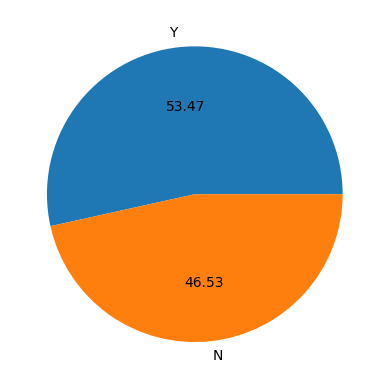

In [14]:
plt.pie(dataset['Di qualità?'].value_counts(), labels=['Y', 'N'], autopct="%0.2f")
plt.show()

Anche qui è evidente che la maggior parte dei vini siano di qualità, rendendo però così sbilanciato il dataset ma su questo argomento ci torneremo in seguito.